# Import Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
%matplotlib inline

# Import Data

In [2]:
data = pd.read_csv('appdata10.csv')

In [3]:
data.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [4]:
data.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data.columns.values

array(['user', 'first_open', 'dayofweek', 'hour', 'age', 'screen_list',
       'numscreens', 'minigame', 'used_premium_feature', 'enrolled',
       'enrolled_date', 'liked'], dtype=object)

## coverting date into integer

In [6]:
data['hour'] = data.hour.str.slice(1,3).astype(int)

In [7]:
data['hour']

0         2
1         1
2        19
3        16
4        18
         ..
49995    13
49996     0
49997    22
49998    12
49999     1
Name: hour, Length: 50000, dtype: int32

In [8]:
data2 = data.copy().drop(columns = ['user', 'first_open','screen_list',
                                    'enrolled','enrolled_date'])
data2

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1
...,...,...,...,...,...,...,...
49995,3,13,32,13,0,0,0
49996,1,0,35,4,0,1,0
49997,2,22,39,25,0,0,0
49998,6,12,27,26,0,0,0


<Figure size 432x288 with 0 Axes>

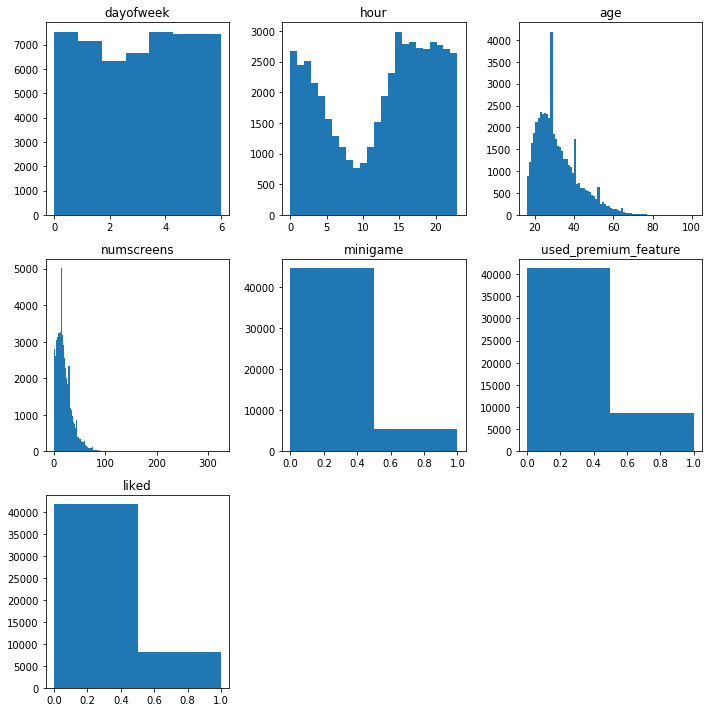

In [9]:
plt.suptitle('Histogram of numerical columns', fontsize= 14)
plt.figure(figsize=(10,10))

for i in range(1, data2.shape[1] + 1):
    plt.subplot(3, 3, i)

    f =plt.gca()
    f.set_title(data2.columns.values[i-1])
    #f.axes.get_yaxis().set_visible(False)
    
    vals= np.size(data2.iloc[:, i-1].unique())
    
    plt.hist(data2.iloc[:, i-1], bins= vals)
plt.tight_layout(rect=(0, 0, 1, 1))
plt.show()

# Corr with the response variable

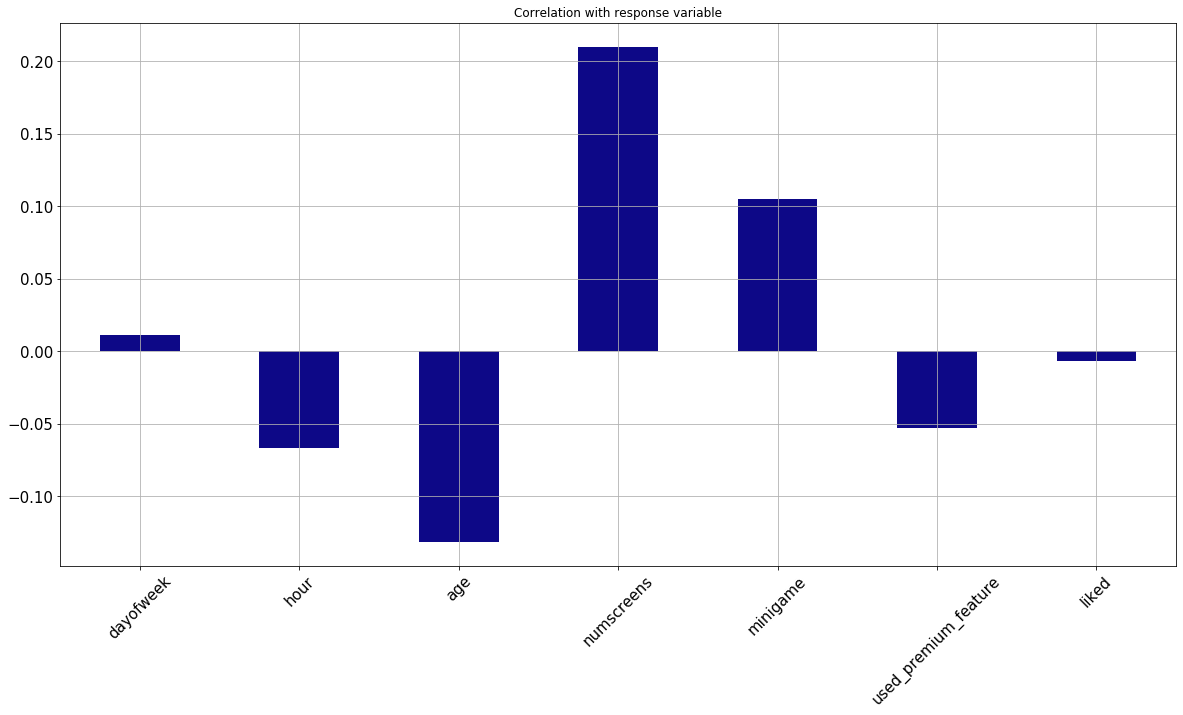

In [10]:
data2.corrwith(data.enrolled).plot.bar(figsize=[20,10], 
                                       title='Correlation with response variable',
                                       fontsize = 15,
                                       rot =45,
                                      grid = True,
                                      cmap= 'plasma')

In [11]:
data2.corr()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
dayofweek,1.000000,0.013249,-0.012326,0.007925,-0.008631,0.001439,-0.005737
hour,0.013249,1.000000,0.018859,-0.076756,-0.009120,0.022553,-0.001725
age,-0.012326,0.018859,1.000000,-0.128739,0.019745,0.004301,-0.002593
numscreens,0.007925,-0.076756,-0.128739,1.000000,0.041154,0.061972,-0.007349
minigame,-0.008631,-0.009120,0.019745,0.041154,1.000000,0.108780,-0.012250
used_premium_feature,0.001439,0.022553,0.004301,0.061972,0.108780,1.000000,0.001690
liked,-0.005737,-0.001725,-0.002593,-0.007349,-0.012250,0.001690,1.000000


In [12]:
mask = np.zeros_like(data2.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

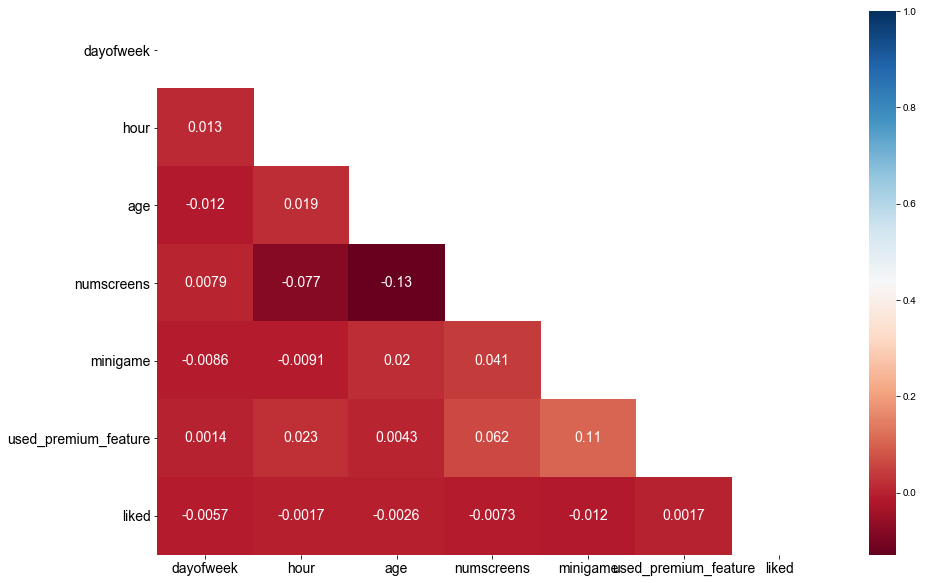

In [13]:
plt.figure(figsize=[15,10])
sns.heatmap(data2.corr(),mask= mask ,cmap = 'RdBu', annot= True, annot_kws={'size':14})
sns.set_style('white')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [14]:
data.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

# Formatting date columns 

In [15]:
data['first_open']= [parser.parse(row_data) for row_data in data['first_open']]

In [16]:
data['enrolled_date']= [parser.parse(row_data) if isinstance(row_data, str) else row_data for row_data in data['enrolled_date']]

In [17]:
data.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

#  finding difference

In [18]:
data['difference'] = (data.enrolled_date - data.first_open ).astype('timedelta64[h]')

# visualising the difference 

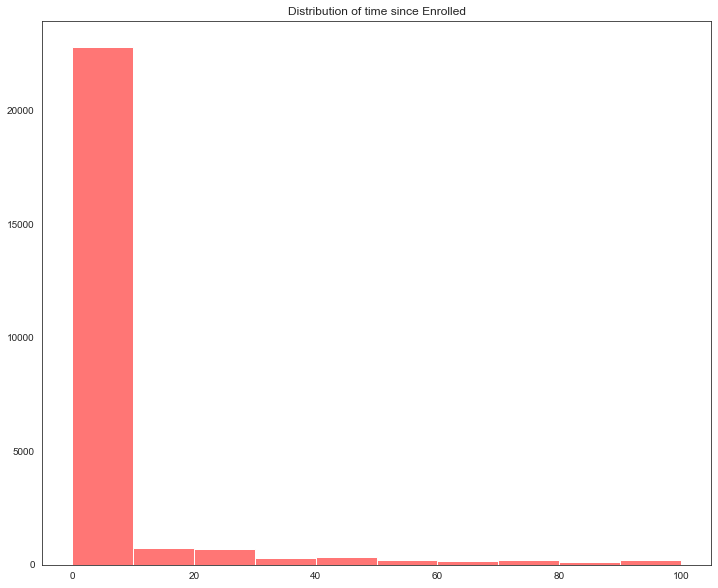

In [19]:
plt.figure(figsize=[12,10])
plt.hist(data['difference'].dropna(), color = '#ff7675', range=[0, 100])
plt.title('Distribution of time since Enrolled')
plt.show()

In [20]:
data= data.drop(columns=['difference','first_open','enrolled_date'])

In [21]:
data2

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1
...,...,...,...,...,...,...,...
49995,3,13,32,13,0,0,0
49996,1,0,35,4,0,1,0
49997,2,22,39,25,0,0,0
49998,6,12,27,26,0,0,0


# formatting the screen list field

In [22]:
top_screens = pd.read_csv('top_screens.csv').top_screens.values
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [23]:
data['screen_list'] = data.screen_list.astype(str) + ','


In [24]:
for sc in top_screens:
    data[sc]= data.screen_list.str.contains(sc).astype(int)
    data['screen_list']= data.screen_list.str.replace(sc+",", "")
    

In [25]:
data['other']= data.screen_list.str.count(",")

In [26]:
data= data.drop(columns=['screen_list'])


In [27]:
data

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,other
0,235136,3,2,23,15,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,6
49996,169179,1,0,35,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
49997,302367,2,22,39,25,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
49998,324905,6,12,27,26,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,13


In [28]:
#funnels
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]

In [29]:
data['savings_count']= data[savings_screens].sum(axis=1)

In [33]:
data = data.drop(columns=savings_screens)

In [35]:
cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
data['CM_count']=data[cm_screens].sum(axis=1)
data = data.drop(columns= cm_screens)

In [37]:
cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
data["CCCount"] = data[cc_screens].sum(axis=1)
data = data.drop(columns=cc_screens)

In [38]:
loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
data["LoansCount"] = data[loan_screens].sum(axis=1)
data = data.drop(columns=loan_screens)

In [39]:
data.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,savings_count,CM_count,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


In [41]:
data.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'other',
       'savings_count', 'CM_count', 'CCCount', 'LoansCount'],
      dtype='object')

In [42]:
data.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,savings_count,CM_count,CCCount,LoansCount
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000,0.517760,...,0.014220,0.013340,0.013400,0.008200,0.007580,6.214260,0.365020,0.92776,0.176860,0.788400
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184,0.499689,...,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787,0.677462
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.00000,0.000000,1.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,10.000000,5.00000,3.000000,3.000000


In [43]:
data.columns.values

array(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location',
       'Institutions', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Splash', 'RewardsContainer', 'EditProfile',
       'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'ProfileJobTitle',
       'Login', 'ProfileEmploymentLength', 'WebView', 'SecurityModal',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker',
       'other', 'savings_count', 'CM_count', 'CCCount', 'LoansCount'],
      dtype=object)

# Savings results 

In [44]:
data.to_csv('new_app_data.csv', index = False)